# Import packages & Data

In [110]:
### Import packages
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV

In [111]:
# Import data
file_path = "/Users/felixyeboah/Documents/Doctorate/Year 1/Fall 2024/Data Science Methods - STA 6366 /Projects/Final Project/pd_speech_features.csv"
data = pd.read_csv(file_path, header=1)

# Display the first few rows to verify
print(data.head())

   id  gender      PPE      DFA     RPDE  numPulses  numPeriodsPulses  \
0   0       1  0.85247  0.71826  0.57227        240               239   
1   0       1  0.76686  0.69481  0.53966        234               233   
2   0       1  0.85083  0.67604  0.58982        232               231   
3   1       0  0.41121  0.79672  0.59257        178               177   
4   1       0  0.32790  0.79782  0.53028        236               235   

   meanPeriodPulses  stdDevPeriodPulses  locPctJitter  ...  \
0          0.008064            0.000087       0.00218  ...   
1          0.008258            0.000073       0.00195  ...   
2          0.008340            0.000060       0.00176  ...   
3          0.010858            0.000183       0.00419  ...   
4          0.008162            0.002669       0.00535  ...   

   tqwt_kurtosisValue_dec_28  tqwt_kurtosisValue_dec_29  \
0                     1.5620                     2.6445   
1                     1.5589                     3.6107   
2          

# Data Exploration

In [112]:
# Check for missing values
data.isnull().sum()


id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64

In [113]:
# Summary Statistics
data.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


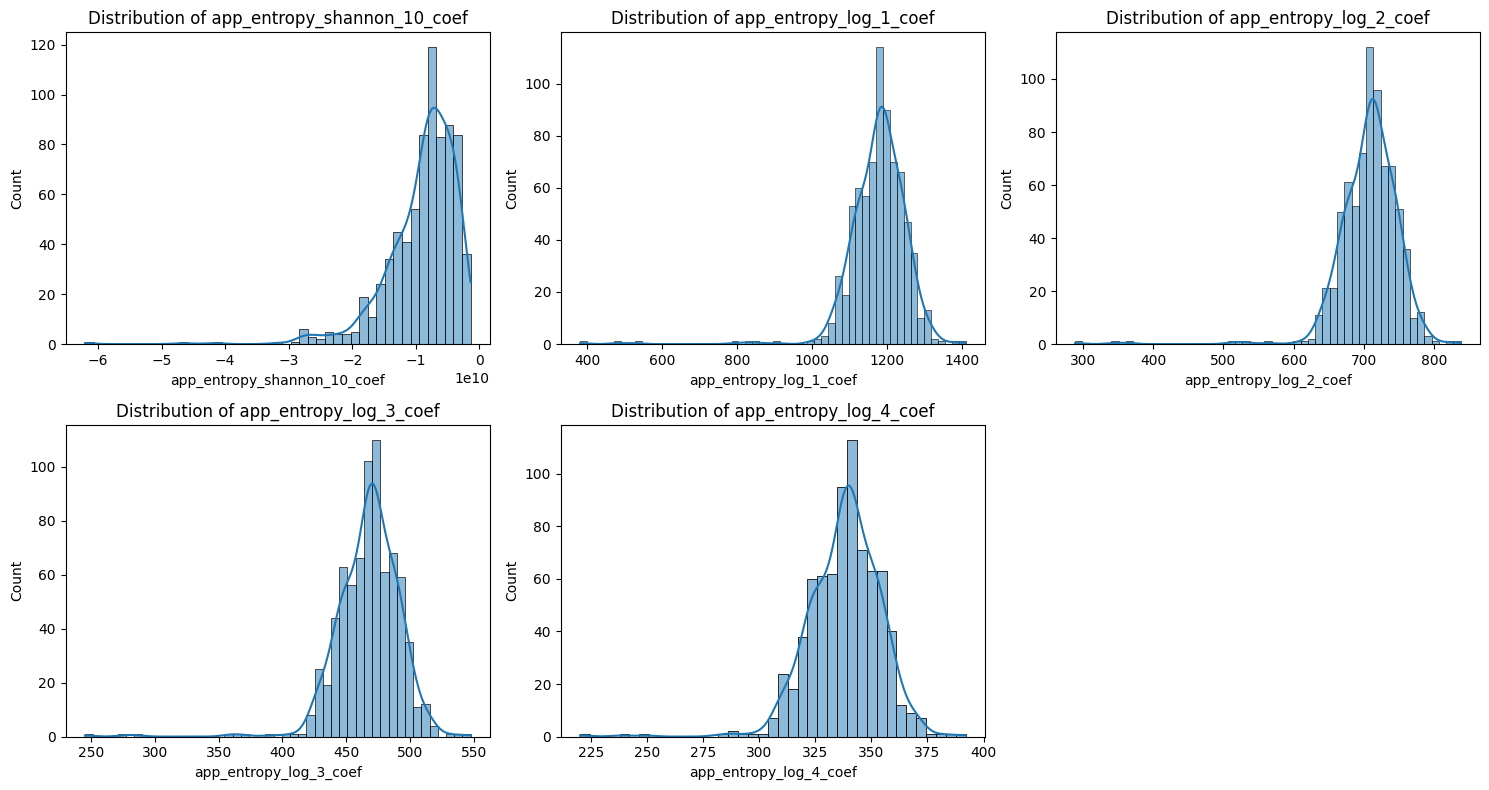

In [114]:
###Select the first 5 features
first_5_features = data.iloc[:, 200:205]

# Plot distributions
plt.figure(figsize=(15, 8))
for i, col in enumerate(first_5_features.columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(first_5_features[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

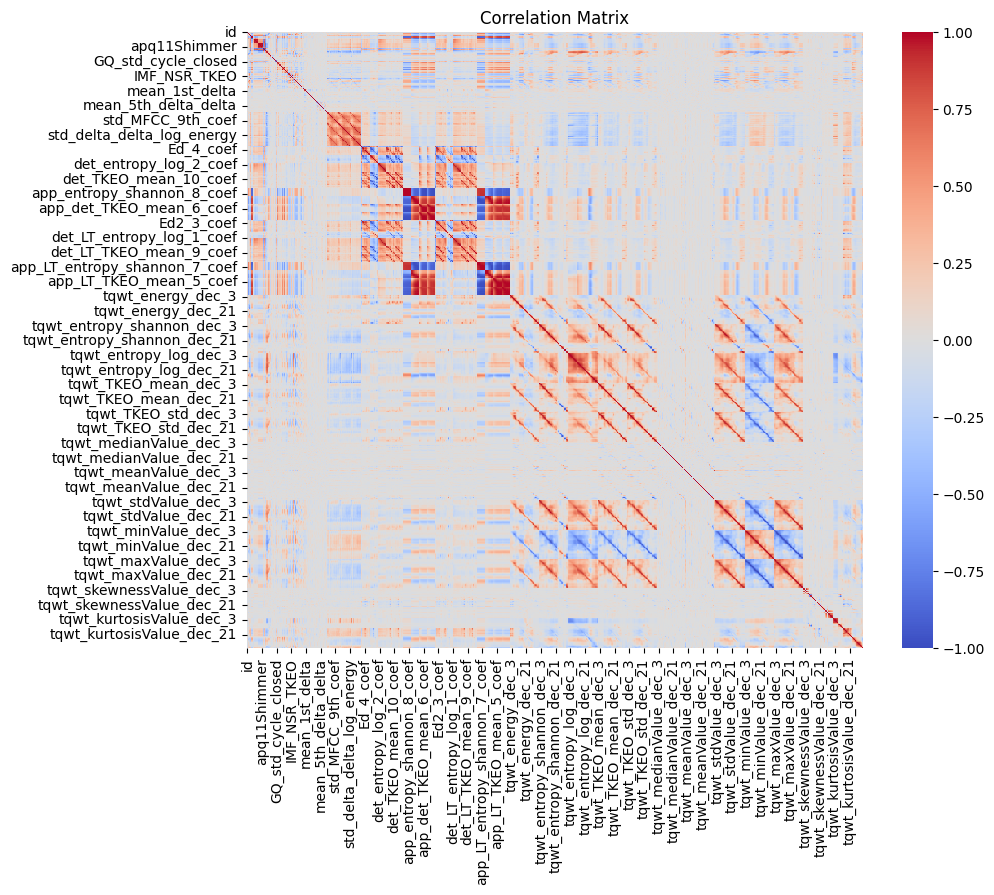

Highly Correlated Variable Pairs:
apq3Shimmer                    ddaShimmer                       1.000000
app_LT_entropy_log_8_coef      app_LT_entropy_log_9_coef        1.000000
app_LT_entropy_shannon_8_coef  app_LT_entropy_shannon_9_coef    1.000000
app_entropy_log_8_coef         app_entropy_log_9_coef           1.000000
app_LT_entropy_log_9_coef      app_LT_entropy_log_10_coef       1.000000
                                                                  ...   
app_entropy_log_10_coef        app_LT_TKEO_std_10_coef          0.990173
Ed2_8_coef                     det_LT_TKEO_std_8_coef           0.990168
app_LT_entropy_shannon_2_coef  app_LT_entropy_shannon_4_coef    0.990136
app_det_TKEO_mean_5_coef       app_TKEO_std_9_coef              0.990074
app_entropy_log_3_coef         app_LT_entropy_log_5_coef        0.990060
Length: 229, dtype: float64


In [115]:
import seaborn as sns
import numpy as np

# Compute the correlation matrix
corr_matrix = data.corr()

# Plot a heatmap for the top correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1, square=True)
plt.title("Correlation Matrix")
plt.show()

# Get pairs of highly correlated variables
high_corr_pairs = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_pairs = high_corr_pairs.stack().sort_values(ascending=False)
print("Highly Correlated Variable Pairs:")
print(high_corr_pairs[high_corr_pairs > 0.99])  # Adjust threshold as needed

In [116]:
# Check distribution of class
data['class'].value_counts(normalize=True)*100

class
1    74.603175
0    25.396825
Name: proportion, dtype: float64

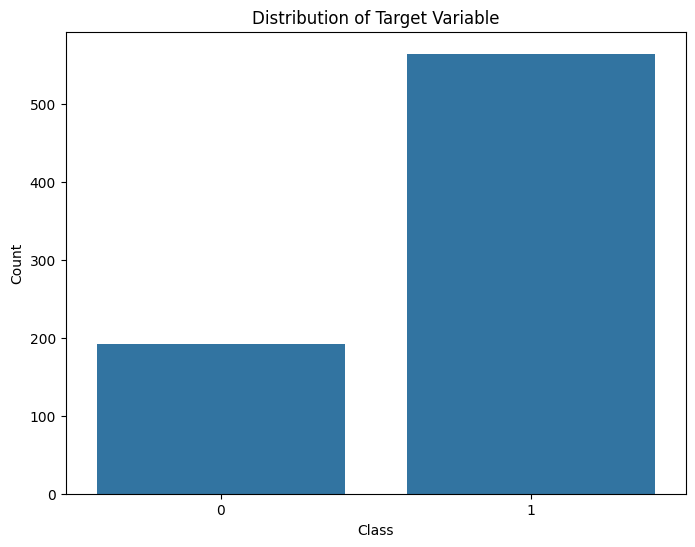

In [117]:
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=data)
plt.title("Distribution of Target Variable")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [119]:
### Data Splitting
X = data.iloc[:, 2:754]
y = data.iloc[:, 754]
from sklearn.model_selection import train_test_split
# Split the PCA-transformed data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
from imblearn.over_sampling import SMOTE
##  Initialize SMOTE for oversampling the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
# Fit and apply SMOTE only to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [122]:
## Scale dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Develop Full Model 

### Logistic Regression 

In [123]:
### Run Full model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
from sklearn.linear_model import LogisticRegression
# Initialize and train the logistic regression model
log_reg= LogisticRegression(max_iter=1000)  # Adjust max_iter if convergence issues occur
log_reg.fit(X_train_resampled, y_train_resampled)
# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.8487
Mean Squared Error (MSE): 0.1513

Confusion Matrix:
[[ 24  14]
 [  9 105]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.63      0.68        38
           1       0.88      0.92      0.90       114

    accuracy                           0.85       152
   macro avg       0.80      0.78      0.79       152
weighted avg       0.84      0.85      0.84       152



### KNN 

In [128]:
from sklearn.neighbors import KNeighborsClassifier
# Initialize the KNeighborsClassifier
knn = KNeighborsClassifier()

# Define a parameter grid to search over values of K
param_grid = {'n_neighbors': range(1, 31)}  # Trying K values from 1 to 30

# Use GridSearchCV to find the best K
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')  # 10-fold cross-validation
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best K value and the corresponding accuracy
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

print(f"The best K value is: {best_k}")
print(f"Cross-validated accuracy with K={best_k}: {best_score:.4f}")

# Train KNN with the best K value on the training set
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_red = best_knn.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred_red)
conf_matrix = confusion_matrix(y_test, y_pred_red)
class_report = classification_report(y_test, y_pred_red)
mse = mean_squared_error(y_test, y_pred_red)

# Display results
print(f"Accuracy: {accuracy:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

The best K value is: 1
Cross-validated accuracy with K=1: 0.9278
Accuracy: 0.8750
Mean Squared Error (MSE): 0.1250

Confusion Matrix:
[[34  4]
 [15 99]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.89      0.78        38
           1       0.96      0.87      0.91       114

    accuracy                           0.88       152
   macro avg       0.83      0.88      0.85       152
weighted avg       0.89      0.88      0.88       152



### Guassian Naive Bayes

In [129]:
from sklearn.naive_bayes import GaussianNB
# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the model
gnb.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = gnb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred_red)

print(f"Accuracy: {accuracy:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.7500
Mean Squared Error (MSE): 0.1250

Confusion Matrix:
[[24 14]
 [24 90]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.63      0.56        38
           1       0.87      0.79      0.83       114

    accuracy                           0.75       152
   macro avg       0.68      0.71      0.69       152
weighted avg       0.77      0.75      0.76       152



### XgBoost

In [ ]:
import xgboost as xgb
# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
xgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Feature Selection Methods

### Feature selection Using Regularized Logistic Regression 

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define the parameter grid, including a higher max_iter
param_grid = {
    'C': np.logspace(-4, 4, 20),  # Testing values of C from 0.0001 to 10,000
    'penalty': ['l1'],  # Using L1 penalty for regularization
    'solver': ['liblinear'],  # 'liblinear' for L1 regularization
    'max_iter': [1000, 2000]  # Increased max_iter to help with convergence
}

# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Set up GridSearchCV with the modified parameter grid
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# Fit grid search to the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': np.float64(11.288378916846883), 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}


In [130]:
#### Randomized Search Cross validation 
import time
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import fbeta_score, make_scorer


start_time = time.time()

# Create a logistic regression model
model = LogisticRegression(max_iter=10000, solver='liblinear')

# Define the parameter distribution
param_dist = {
  'C': np.logspace(start=-3, stop=2, num=6), # 6 numbers from 10e-3 to 10e2
  'penalty': ['l1', 'l2']
}

# Perform randomized search with 5-fold cross-validation
random_search = RandomizedSearchCV(model, param_dist, cv=10,
  scoring='f1', n_iter=6)
random_search.fit(X_train_resampled, y_train_resampled)

end_time = time.time()

# Get the best hyperparameters
best_model = random_search.best_estimator_
print(best_model)
print(f"Best score: {random_search.best_score_}")
print("Time taken:", time.strftime("%H:%M:%S", time.gmtime(end_time - start_time)))

LogisticRegression(C=np.float64(100.0), max_iter=10000, penalty='l1',
                   solver='liblinear')
Best score: 0.9247994979793613
Time taken: 00:00:03


In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define the parameter grid for Logistic Regression
param_grid = {
    'C': np.logspace(-4, 4, 20),  # Range of C values (inverse of regularization strength)
    'penalty': ['l1'],  # L1 penalty (Lasso) for feature selection
    'solver': ['liblinear'],  # Solver that supports L1 regularization
    'max_iter': [100, 200, 500, 1000]  # Different values for max iterations
}

# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Set up GridSearchCV with the correct parameter grid
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# Fit grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


/Users/felixyeboah/Documents/Doctorate/Year 1/Fall 2024/Data Science Methods - STA 6366 /Projects/Final Project/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/felixyeboah/Documents/Doctorate/Year 1/Fall 2024/Data Science Methods - STA 6366 /Projects/Final Project/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/felixyeboah/Documents/Doctorate/Year 1/Fall 2024/Data Science Methods - STA 6366 /Projects/Final Project/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/felixyeboah/Documents/Doctorate/Year 1/Fall 2024/Data Science Methods - STA 6366 /Projects/Final Project/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235

KeyboardInterrupt: 

Accuracy: 0.8421
Mean Squared Error (MSE): 0.1579

Confusion Matrix:
[[ 24  14]
 [ 10 104]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.63      0.67        38
           1       0.88      0.91      0.90       114

    accuracy                           0.84       152
   macro avg       0.79      0.77      0.78       152
weighted avg       0.84      0.84      0.84       152

Number of selected features: 502


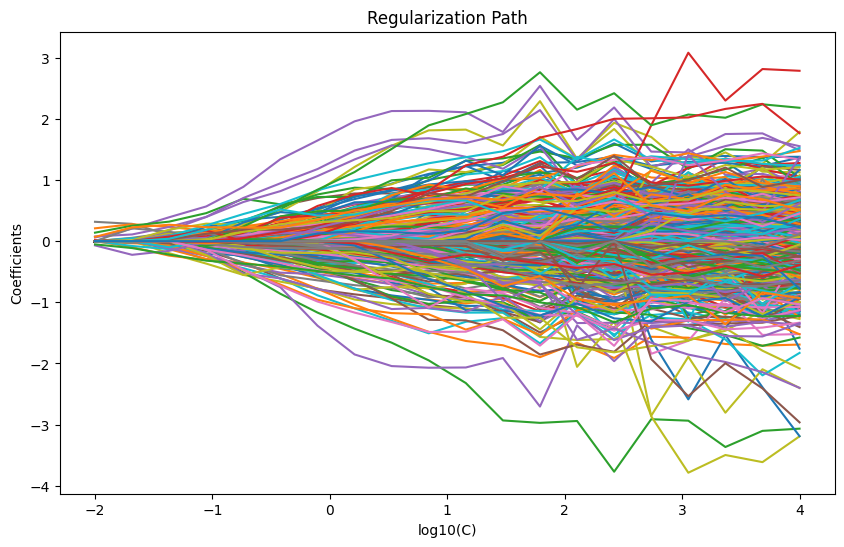

In [136]:
# Initialize the regularized logistic regression model
# Use penalty='l1' for Lasso or penalty='l2' for Ridge regularization
log_reg = LogisticRegression(penalty='l1', C=100, solver='liblinear', max_iter=10000)  # C is the inverse of regularization strength

# Fit the model to the training data
log_reg.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

num_selected_features = np.sum(log_reg.coef_ != 0)
print(f"Number of selected features: {num_selected_features}")

# Define a range of regularization strengths
C_values = np.logspace(-2, 4, 20)

# Train logistic regression models with different regularization strengths
coefficients = []
for C in C_values:
    model = LogisticRegression(max_iter=10000, penalty='l1', solver='liblinear', C=C)
    model.fit(X_train_resampled, y_train_resampled)
    coefficients.append(model.coef_)

# Reshape the coefficients array to match the dimensions of the C_values array
coefficients = np.array(coefficients).reshape(len(C_values), -1)

# Plot the regularization path
plt.figure(figsize=(10, 6))
plt.plot(np.log10(C_values), coefficients)
plt.xlabel('log10(C)')
plt.ylabel('Coefficients')
plt.title('Regularization Path')
plt.show()

In [109]:
# Get non-zero coefficients and corresponding feature names
non_zero_indices = log_reg.coef_[0] != 0  # Boolean mask for non-zero coefficients
non_zero_features = X.columns[non_zero_indices]  # Filter feature names based on non-zero coefficients
X_subset = X_train[non_zero_features]

IndexError: boolean index did not match indexed array along axis 0; size of axis is 752 but size of corresponding boolean axis is 247

In [103]:
### Data Splitting After Variable Selection
y = data.iloc[:, 754]
from sklearn.model_selection import train_test_split
# Split the PCA-transformed data into training and test sets
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_subset, y, test_size=0.2, random_state=42)
## Scale dataset
from sklearn.preprocessing import StandardScaler
X_train_s = StandardScaler().fit_transform(X_train_s)
X_test_s = StandardScaler().fit_transform(X_test_s)

### Logistic Regression After Variable Selection

In [104]:
### Run Reduced model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
from sklearn.linear_model import LogisticRegression
# Initialize and train the logistic regression model
log_reg= LogisticRegression(max_iter=1000)  # Adjust max_iter if convergence issues occur
log_reg.fit(X_train_s, y_train_s)
# Make predictions on the test set
y_pred = log_reg.predict(X_test_s)

# Evaluate model performance
accuracy = accuracy_score(y_test_s, y_pred)
conf_matrix = confusion_matrix(y_test_s, y_pred)
class_report = classification_report(y_test_s, y_pred)
mse = mean_squared_error(y_test_s, y_pred)

# Display results
print(f"Accuracy: {accuracy:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.8618
Mean Squared Error (MSE): 0.1382

Confusion Matrix:
[[ 26  12]
 [  9 105]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.68      0.71        38
           1       0.90      0.92      0.91       114

    accuracy                           0.86       152
   macro avg       0.82      0.80      0.81       152
weighted avg       0.86      0.86      0.86       152



### KNN  After Variable Selection

In [105]:
from sklearn.neighbors import KNeighborsClassifier
# Initialize the KNeighborsClassifier
knn = KNeighborsClassifier()

# Define a parameter grid to search over values of K
param_grid = {'n_neighbors': range(1, 31)}  # Trying K values from 1 to 30

# Use GridSearchCV to find the best K
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')  # 5-fold cross-validation
grid_search.fit(X_train_s, y_train_s)

# Get the best K value and the corresponding accuracy
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

print(f"The best K value is: {best_k}")
print(f"Cross-validated accuracy with K={best_k}: {best_score:.4f}")

# Train KNN with the best K value on the training set
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_s, y_train_s)

# Make predictions on the test set
y_pred_red = best_knn.predict(X_test_s)

# Evaluate model performance
accuracy = accuracy_score(y_test_s, y_pred_red)
conf_matrix = confusion_matrix(y_test_s, y_pred_red)
class_report = classification_report(y_test_s, y_pred_red)
mse = mean_squared_error(y_test_s, y_pred_red)

# Display results
print(f"Accuracy: {accuracy:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

The best K value is: 1
Cross-validated accuracy with K=1: 0.8858
Accuracy: 0.9276
Mean Squared Error (MSE): 0.0724

Confusion Matrix:
[[ 30   8]
 [  3 111]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.79      0.85        38
           1       0.93      0.97      0.95       114

    accuracy                           0.93       152
   macro avg       0.92      0.88      0.90       152
weighted avg       0.93      0.93      0.93       152



###  Gaussian Naive Bayes After Variable Selection

In [107]:
from sklearn.naive_bayes import GaussianNB
# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the model
gnb.fit(X_train_s, y_train_s)

# Make predictions on the test set
y_pred = gnb.predict(X_test_s)

# Evaluate the model
accuracy = accuracy_score(y_test_s, y_pred)
conf_matrix = confusion_matrix(y_test_s, y_pred)
class_report = classification_report(y_test_s, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.7500

Confusion Matrix:
[[27 11]
 [27 87]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.71      0.59        38
           1       0.89      0.76      0.82       114

    accuracy                           0.75       152
   macro avg       0.69      0.74      0.70       152
weighted avg       0.79      0.75      0.76       152



In [ ]:
#### Standardization & PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

### Standardize data
scaled_X = StandardScaler().fit_transform(X)

# Initialize PCA and fit to data
pca = PCA()
X_pca = pca.fit_transform(scaled_X)

#### Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()


In [ ]:
pca = PCA(n_components=0.95)  # Retains components that explain 95% of the variance
X_reduced = pca.fit_transform(scaled_X)

## Create the Scree Plot
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

# Display the number of components selected
print(f"Number of components selected to retain 95% variance: {pca.n_components_}")


In [ ]:
## Column selection based on explained variance 
X_reduced = pca.fit_transform(scaled_X)
columns = [f"PC{i+1}" for i in range(X_reduced.shape[1])]
X_reduced_df = pd.DataFrame(X_reduced, columns=columns)


In [ ]:
# Convert loadings to a DataFrame
loadings = pca.components_
loadings_df = pd.DataFrame(loadings.T, columns=[f"PC{i+1}" for i in range(pca.n_components_)], index=X.columns)

# Display the most influential features for each component
for i, col in enumerate(loadings_df.columns):
    print(f"\nTop features contributing to {col}:")
    print(loadings_df[col].abs().sort_values(ascending=False).head(10))

In [ ]:
# Initialize and train the logistic regression model
log_reg = LogisticRegression(max_iter=5000)  # Adjust max_iter if convergence issues occur
log_reg.fit(Xful_train, y_train)
# Make predictions on the test set
y_pred = log_reg.predict(Xful_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create a logistic regression model
model = LogisticRegression(solver='saga', max_iter=5000,class_weight='balanced')

# Create a list of regularization strengths and penalties to test
params = {
    'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'penalty': [None, 'l1', 'l2', 'elasticnet'],
    'l1_ratio': [.25, .50, .75] # also called alpha; used for elasticnet
}

# Perform 10-fold cross-validation with different regularization strengths and penalties
clf = GridSearchCV(model, params, cv=5, scoring='accuracy')
clf.fit(Xful_train, y_train)

# Print the best regularization strength and penalty
print("Best regularization strength:", clf.best_params_['C'])
print("Best penalty:", clf.best_params_['penalty'])

if clf.best_params_['penalty'] == 'elasticnet':
    print("Best alpha:", clf.best_params_['l1_ratio'])

print("Best score:", clf.best_score_)

In [ ]:
# Get the original column names (before transformation)
original_feature_names = data.drop(columns=['class']).columns  # Replace 'target_column' with the actual target column name

# Get the indices of selected features (non-zero coefficients)
selected_feature_indices = np.where(log_reg.coef_[0] != 0)[0]

# Get the names of the selected features using the indices
selected_feature_names = original_feature_names[selected_feature_indices]

# Print the selected feature names
print("Selected Features:")
print(selected_feature_names)


In [ ]:
# Identify selected features based on non-zero coefficients
selected_features = log_reg.coef_ != 0  # Boolean array of selected features
X_train_selected = Xful_train[:, selected_features[0]]  # Filter training data to selected features
X_test_selected = Xful_test[:, selected_features[0]]    # Filter test data to selected features

# Retrain logistic regression using only the selected features
log_reg_selected = LogisticRegression(max_iter=5000,class_weight='balanced')
log_reg_selected.fit(X_train_selected, y_train)

# Evaluate the model with selected features
y_pred_selected = log_reg_selected.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred_selected)
conf_matrix = confusion_matrix(y_test, y_pred_selected)
class_report = classification_report(y_test, y_pred_selected)
mse = mean_squared_error(y_test, y_pred_selected)

# Display results
print(f"Accuracy with selected features: {accuracy:.4f}")
print(f"Mean Squared Error (MSE) with selected features: {mse:.4f}")
print("\nConfusion Matrix with selected features:")
print(conf_matrix)
print("\nClassification Report with selected features:")
print(class_report)

In [ ]:
#### KNN with selected variables from Lasso 